In [648]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [649]:
df = pd.read_csv('data-heart/heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [650]:
df.shape

(918, 12)

In [651]:
df['HeartDisease'].unique()

array([0, 1])

In [652]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


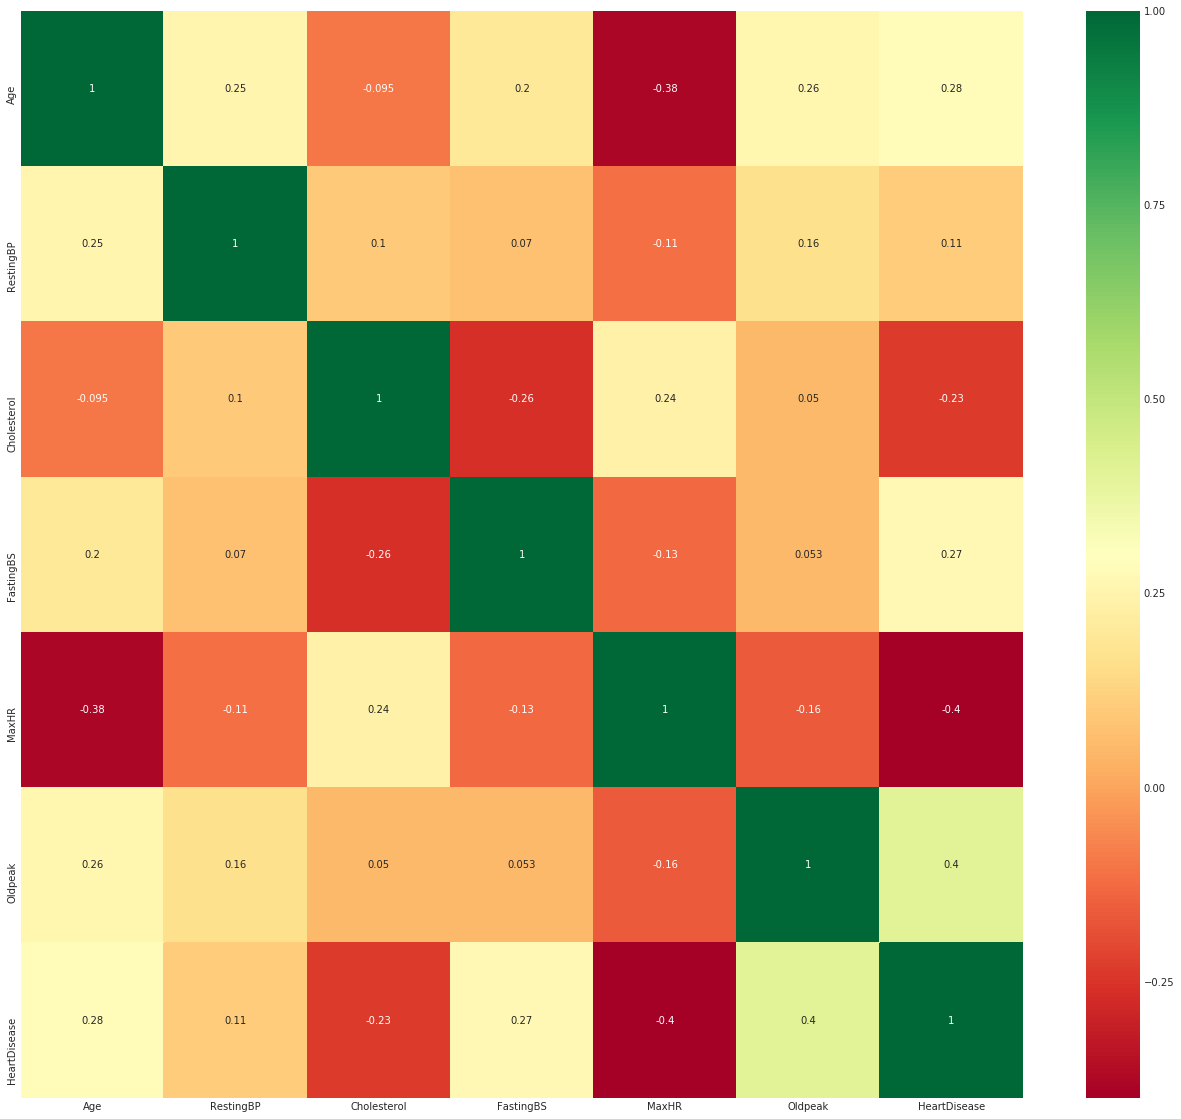

In [653]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d685f91d0>,
      dtype=object)

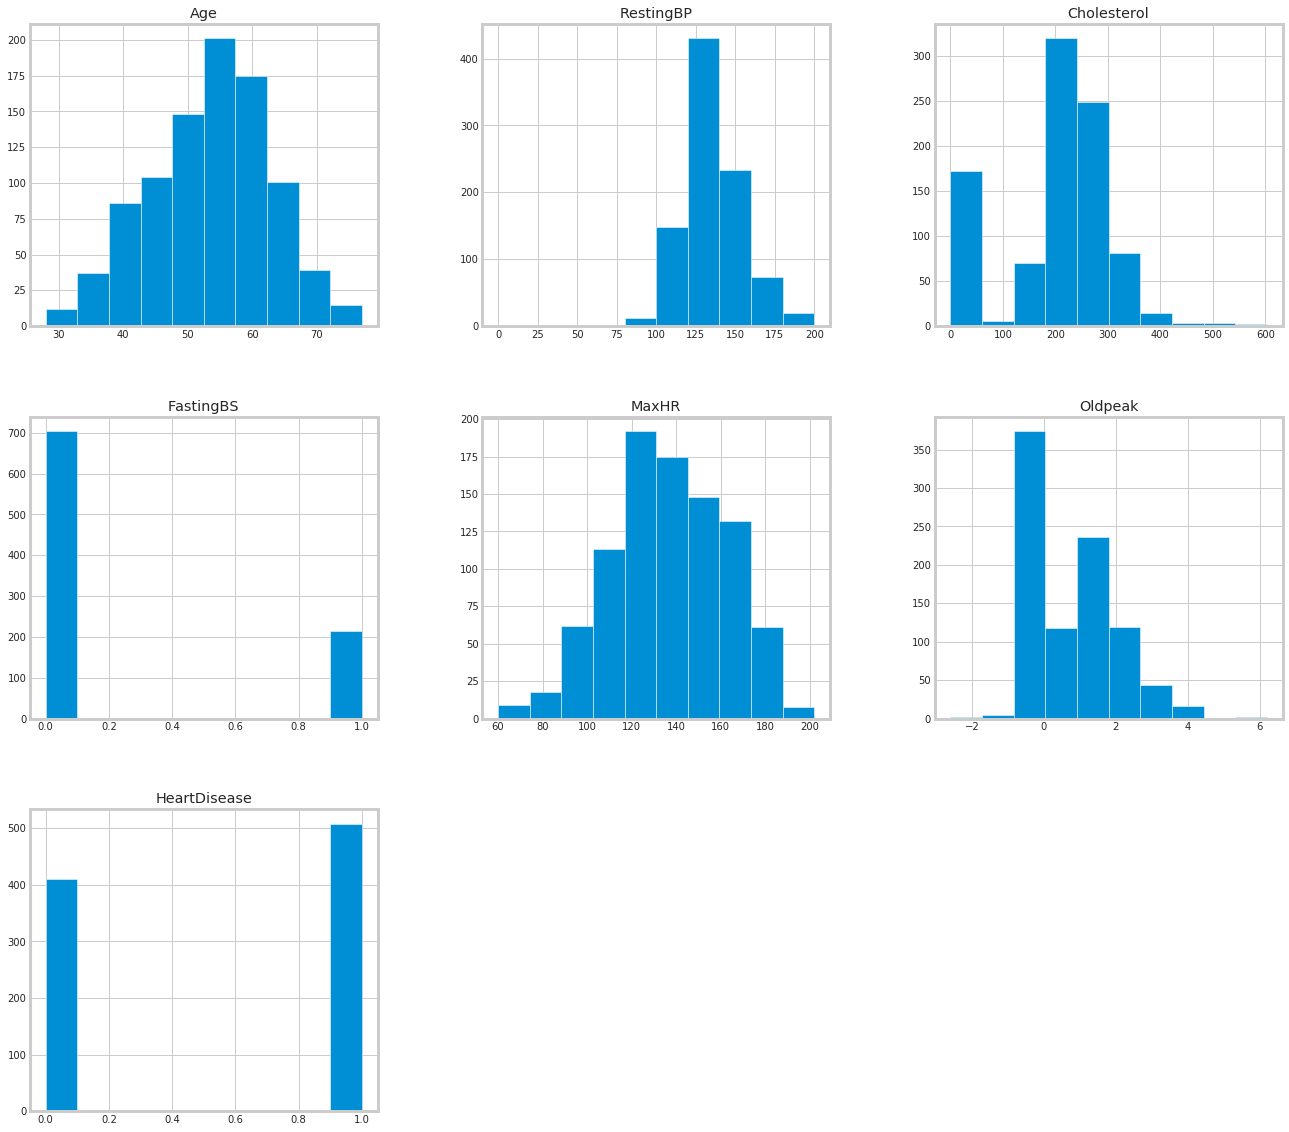

In [654]:
df.hist(figsize=(20,20))

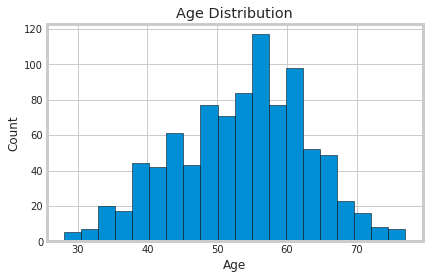

In [655]:
# Histogram Plot of Site EUI

plt.hist(df['Age'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Age'); 
plt.ylabel('Count'); plt.title('Age Distribution');

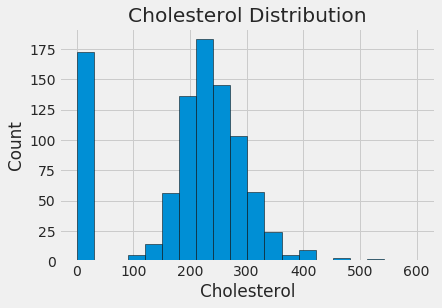

In [656]:
# Histogram of the Energy Star Score

plt.style.use('fivethirtyeight')
plt.hist(df['Cholesterol'].dropna(), bins = 20, edgecolor = 'k');
plt.xlabel('Cholesterol'); plt.ylabel('Count'); 
plt.title('Cholesterol Distribution');

In [657]:
yes_hd = df[df['HeartDisease'] == 1]
no_hd = df[df['HeartDisease'] == 0]

In [658]:
print(yes_hd.shape, no_hd.shape)

(508, 12) (410, 12)


In [659]:
my_tab = pd.crosstab(index=df['HeartDisease'], columns="Count")
my_tab = my_tab.sort_values('Count', ascending=[False])
print(my_tab)

col_0         Count
HeartDisease       
1               508
0               410


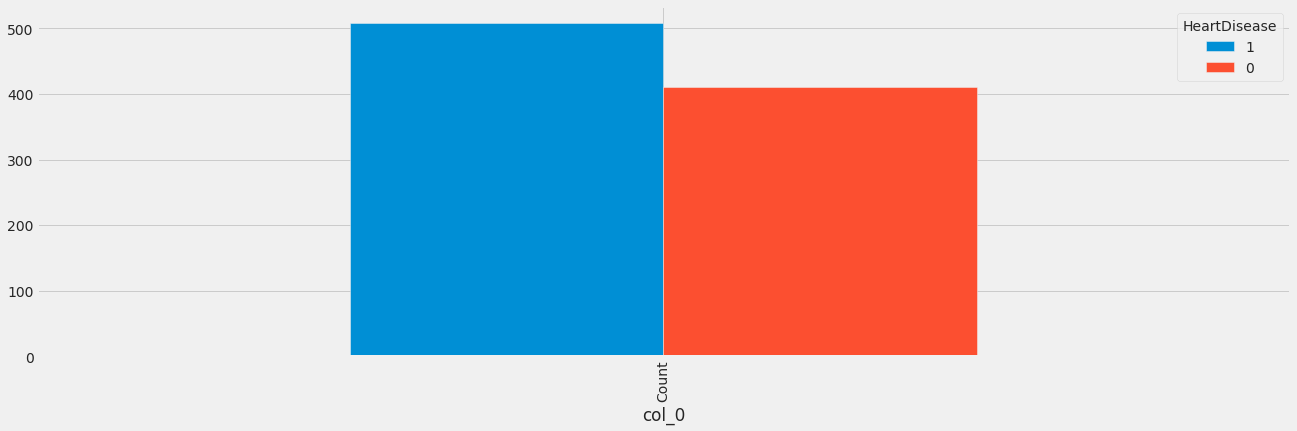

In [660]:
data_counts = pd.DataFrame(my_tab)
pd.DataFrame(data_counts).transpose().plot(kind='bar', figsize=(20,6), stacked=False)

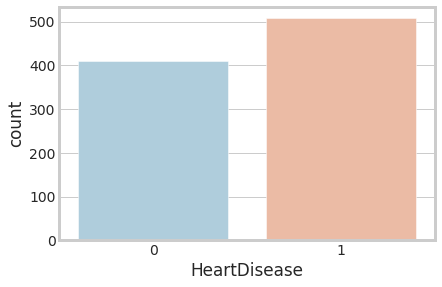

In [661]:
sns.set_style('whitegrid')
sns.countplot(x='HeartDisease',data=df,palette='RdBu_r')

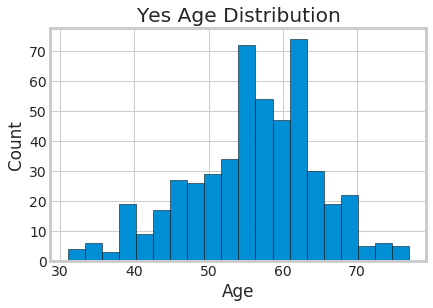

In [662]:
# Histogram Plot of Site EUI

plt.hist(yes_hd['Age'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Age'); 
plt.ylabel('Count'); plt.title('Yes Age Distribution');

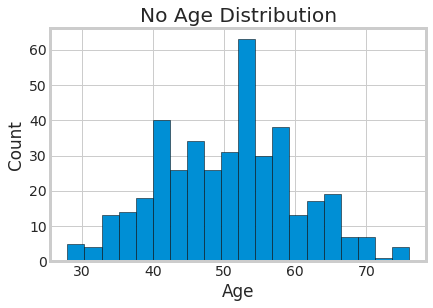

In [663]:
# Histogram Plot of Site EUI

plt.hist(no_hd['Age'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Age'); 
plt.ylabel('Count'); plt.title('No Age Distribution');

In [664]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [665]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [668]:
data = {'Cholesterol': [df[df['Sex'] == 'M']['Cholesterol'].mean(),df[df['Sex'] == 'F']['Cholesterol'].mean()],
        'RestingBP': [df[df['Sex'] == 'M']['RestingBP'].mean(), df[df['Sex'] == 'F']['RestingBP'].mean()],
        'FastingBS': [df[df['Sex'] == 'M']['FastingBS'].mean(), df[df['Sex'] == 'F']['FastingBS'].mean()],
        'MaxHR': [df[df['Sex'] == 'M']['MaxHR'].mean(), df[df['Sex'] == 'F']['MaxHR'].mean()],
        'Oldpeak': [df[df['Sex'] == 'M']['Oldpeak'].mean(), df[df['Sex'] == 'F']['Oldpeak'].mean()],
       }

In [669]:
x_index = ['Male', 'Female']
data

{'Cholesterol': [187.51310344827587, 241.19689119170985],
 'RestingBP': [132.44551724137932, 132.21243523316062],
 'FastingBS': [0.2593103448275862, 0.13471502590673576],
 'MaxHR': [134.32551724137932, 146.13989637305698],
 'Oldpeak': [0.9455172413793105, 0.6689119170984457]}

In [670]:
df_2 = pd.DataFrame(data=data, index=x_index)
df_2 = df_2.astype(int)
df_2

,Cholesterol,RestingBP,FastingBS,MaxHR,Oldpeak
Male,187,132,0,134,0
Female,241,132,0,146,0


In [671]:
df_2 = df_2.T
df_2

,Male,Female
Cholesterol,187,241
RestingBP,132,132
FastingBS,0,0
MaxHR,134,146
Oldpeak,0,0


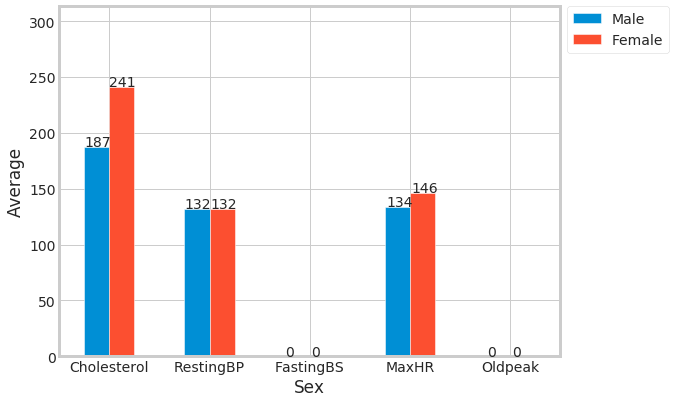

In [672]:
import pandas as pd

ax = df_2.plot(kind='bar', rot=0, xlabel='Sex', ylabel='Average', figsize=(8, 6))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

ax.margins(y=0.3)

# move the legend out of the plot
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [673]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [674]:
X_feature = df[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']]
y_feature = df.iloc[:,-1]

cols = X_feature.columns 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_feature = scaler.fit_transform(X_feature)
X_feature = pd.DataFrame(X_feature)

In [675]:
from sklearn.feature_selection import SelectKBest

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_feature,y_feature)

In [676]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(cols)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5 best features

         Specs      Score
3    FastingBS  50.296983
4        MaxHR   8.738325
5      Oldpeak   5.546577
0          Age   5.191929
2  Cholesterol   4.957809


[0.16015294 0.1329644  0.20031516 0.05455105 0.22022315 0.23179329]


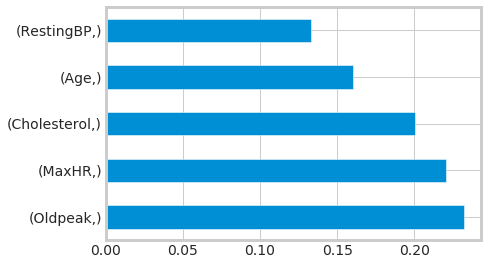

In [677]:
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_feature,y_feature)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=dfcolumns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [678]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [679]:
df = df.drop(['FastingBS'], axis = 1)

In [680]:
dataset = pd.get_dummies(df, columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [681]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale = ['Age', 'Cholesterol', 'MaxHR', 'RestingBP', 'Oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [682]:
y = dataset['HeartDisease']
X = dataset.drop(['HeartDisease'], axis = 1)

In [683]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X = shuffle(X, random_state=0)
y = shuffle(y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 642 samples.
Testing set has 276 samples.


In [684]:
#Model Building

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [685]:
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NN', MLPClassifier()))

In [686]:
results = []
names = []

scoring = 'accuracy'

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

In [687]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s:     %f      (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR:     0.849087      (0.056473)
LDA:     0.858437      (0.057046)
KNN:     0.856803      (0.041342)
CART:     0.793029      (0.061973)
NB:     0.852067      (0.055876)
SVM:     0.869255      (0.040428)
RFC:     0.859976      (0.057485)
NN:     0.866202      (0.057981)


In [688]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

final_model = RandomForestClassifier()

final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[107  19]
 [ 17 133]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       126
           1       0.88      0.89      0.88       150

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

0.8679365079365079


In [689]:
C = confusion_matrix(y_test, y_pred)

np.round(C / C.astype(np.float).sum(axis=1),3)

array([[0.849, 0.127],
       [0.135, 0.887]])

In [690]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

estimators = [
        ('RFC', RandomForestClassifier(random_state=42)),
        ('SVM', LogisticRegression()),
        ('DTC', DecisionTreeClassifier()),
        ('KNN', KNeighborsClassifier()),
        ('NNC', MLPClassifier())
]

clfs = StackingClassifier(estimators=estimators, final_estimator=SVC())
    
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clfs.fit(X_train, y_train).score(X_test, y_test)

y_pred = clfs.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# Evaluate accuracy
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[ 76  21]
 [ 11 122]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.83        97
           1       0.85      0.92      0.88       133

    accuracy                           0.86       230
   macro avg       0.86      0.85      0.86       230
weighted avg       0.86      0.86      0.86       230

0.850399193860941


In [691]:
from sklearn.multiclass import OneVsRestClassifier
dnns_classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5))
dnns_classifier.fit(X_train, y_train)
dnns_predictions_labels = dnns_classifier.predict(X_test)

# Evaluate accuracy
print(confusion_matrix(y_test, dnns_predictions_labels))
print(classification_report(y_test, dnns_predictions_labels))

[[ 79  18]
 [ 15 118]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        97
           1       0.87      0.89      0.88       133

    accuracy                           0.86       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230



In [692]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), [100]*5],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.0004, 0.0005, 0.05],
    'learning_rate': ['constant','adaptive']
}

In [693]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(max_iter=100, random_state=1)

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)

clf.fit(X, y)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.0004, 0.0005, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,),
                                                [100, 100, 100, 100, 100]],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [694]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [695]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

In [696]:
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print(confusion_matrix(y_true, y_pred))

print('Results on the test set:')
print(classification_report(y_true, y_pred))
print(roc_auc_score(y_test, y_pred))

[[ 87  10]
 [  4 129]]
Results on the test set:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        97
           1       0.93      0.97      0.95       133

    accuracy                           0.94       230
   macro avg       0.94      0.93      0.94       230
weighted avg       0.94      0.94      0.94       230

0.9334160142624603


In [697]:
classifier = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=123, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
print(roc_auc_score(y_test, pred))

[[ 82  15]
 [ 14 119]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        97
           1       0.89      0.89      0.89       133

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230

0.8700488334237656


In [698]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0


In [699]:
new = df.drop(['HeartDisease'], axis=1)
newColumns = list(new.columns)

In [700]:
model_columns = newColumns

import joblib

Final_Model = 'FlaskAPI/Final-Model.sav'
joblib.dump(clf, Final_Model)

Model_columns = 'FlaskAPI/Final-Model-Columns.sav'
joblib.dump(model_columns, Model_columns)

['Final-Model-Columns.sav']